In [31]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
station = pd.read_csv('mta_data/turnstile_190504.txt')

In [33]:
from os import listdir
stations = pd.DataFrame()
counter = 0
redhook_station = ['BERGEN ST','CARROLL ST','SMITH-9 ST']
for file in listdir('mta_data'):
    filename = 'mta_data/'+file
    if filename.endswith('.txt'):
            if counter == 0:
                stations = pd.read_csv(filename)
                stations = stations[stations['STATION'].isin(redhook_station)]
                counter += 1
            else:
                stations = pd.concat([stations,pd.read_csv(filename)])
                stations = stations[stations['STATION'].isin(redhook_station)]

In [34]:
stations.shape

(84946, 11)

In [35]:
station.shape

(206857, 11)

<img src="redhook_mta.png">

In [36]:
redhook_station = ['BERGEN ST','CARROLL ST','SMITH-9 ST']
redhook_trips = stations[stations['STATION'].isin(redhook_station)]

In [37]:
redhook_trips.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
99505,N531,R129,01-00-00,BERGEN ST,FG,IND,04/28/2018,01:00:00,REGULAR,421437,519380
99506,N531,R129,01-00-00,BERGEN ST,FG,IND,04/28/2018,05:00:00,REGULAR,421443,519392
99507,N531,R129,01-00-00,BERGEN ST,FG,IND,04/28/2018,09:00:00,REGULAR,421457,519421
99508,N531,R129,01-00-00,BERGEN ST,FG,IND,04/28/2018,13:00:00,REGULAR,421540,519507
99509,N531,R129,01-00-00,BERGEN ST,FG,IND,04/28/2018,17:00:00,REGULAR,421662,519610


In [38]:
redhook_trips = redhook_trips[redhook_trips['DESC'] == 'REGULAR']

In [39]:
redhook_trips['date_time'] = pd.to_datetime(redhook_trips['DATE'] + ' ' + redhook_trips['TIME'])
# redhook_trips['DATE'] = pd.to_datetime(redhook_trips['DATE'])
# redhook_trips['TIME'] = pd.to_timedelta(redhook_trips['TIME'])

In [40]:
redhook_trips.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'date_time'],
      dtype='object')

In [41]:
redhook_trips.columns = ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES','EXITS','date_time']

In [70]:
daily_trips = redhook_trips.set_index('date_time').resample('1D').sum()

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.]),
 <a list of 7 Text xticklabel objects>)

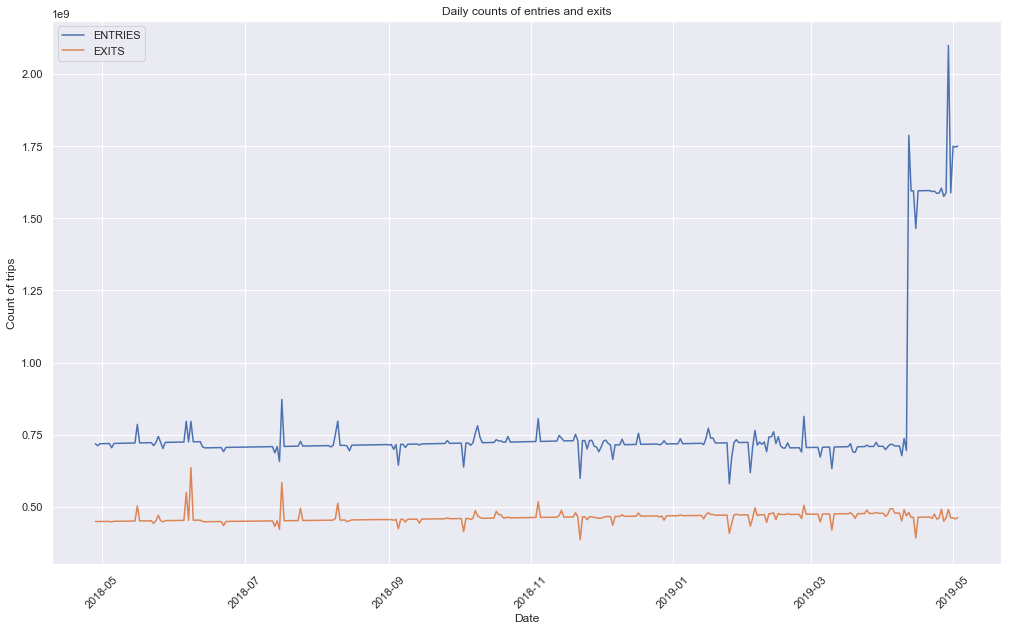

In [73]:
plt.figure(figsize=(17,10))
plt.plot(daily_trips.index, daily_trips.ENTRIES)
plt.plot(daily_trips.index, daily_trips.EXITS)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of entries and exits")
plt.xticks(rotation='45')

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.]),
 <a list of 7 Text xticklabel objects>)

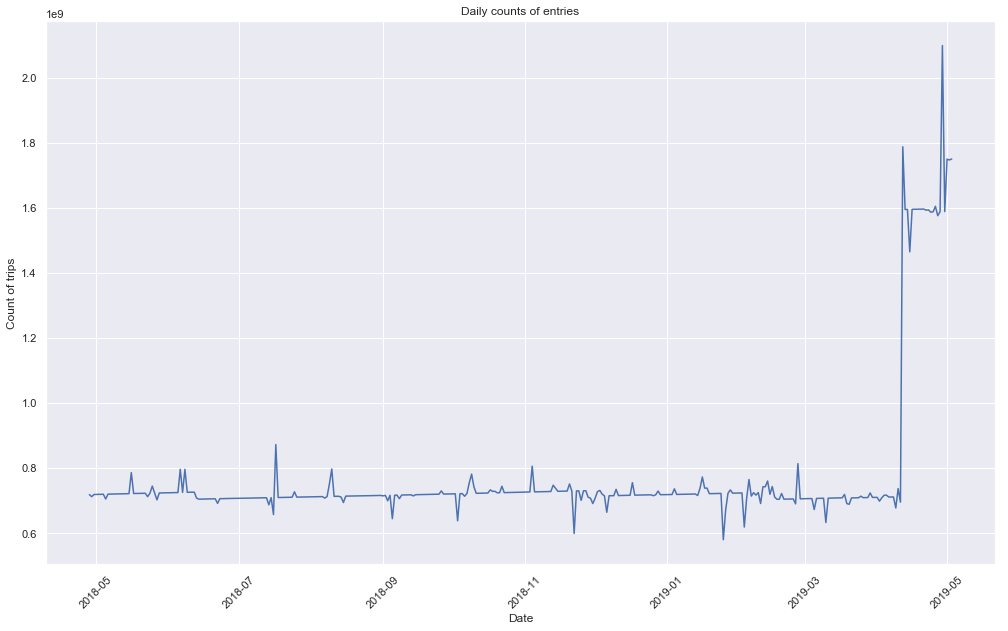

In [74]:
plt.figure(figsize=(17,10))
plt.plot(daily_trips.index, daily_trips.ENTRIES)
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of entries")
plt.xticks(rotation='45')

(array([736815., 736876., 736938., 736999., 737060., 737119., 737180.]),
 <a list of 7 Text xticklabel objects>)

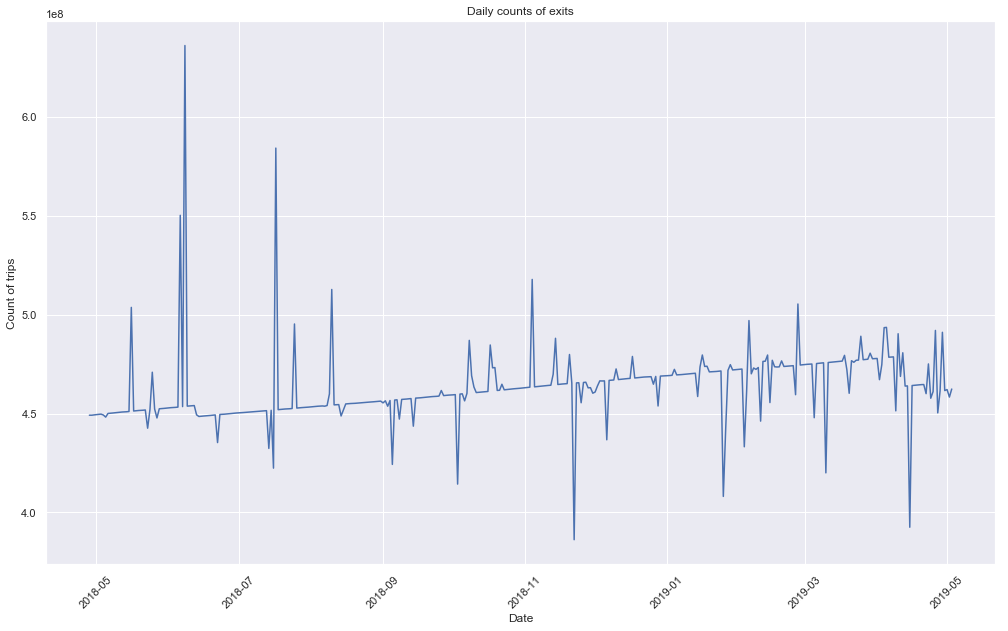

In [75]:
plt.figure(figsize=(17,10))
plt.plot(daily_trips.index, daily_trips.EXITS)
plt.xlabel('Date')
plt.ylabel('Count of trips')
plt.title("Daily counts of exits")
plt.xticks(rotation='45')

([<matplotlib.axis.XTick at 0x178ac543908>,
 <a list of 7 Text xticklabel objects>)

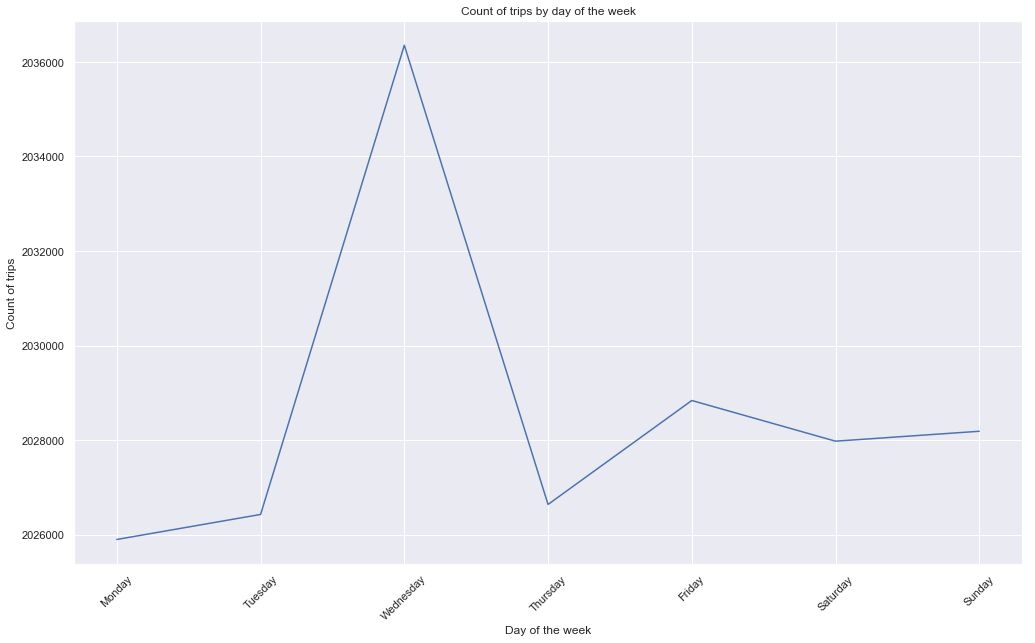

In [76]:
redhook_trips['dow'] = redhook_trips.date_time.dt.dayofweek
daily_trips = redhook_trips.groupby('dow').mean().reset_index()
plt.figure(figsize=(17,10))
plt.plot(daily_trips['dow'],daily_trips['EXITS'])
plt.xlabel('Day of the week')
plt.ylabel('Count of trips')
plt.title("Count of trips by day of the week")
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation = 45)

([<matplotlib.axis.XTick at 0x178ac5e3438>,
 <a list of 7 Text xticklabel objects>)

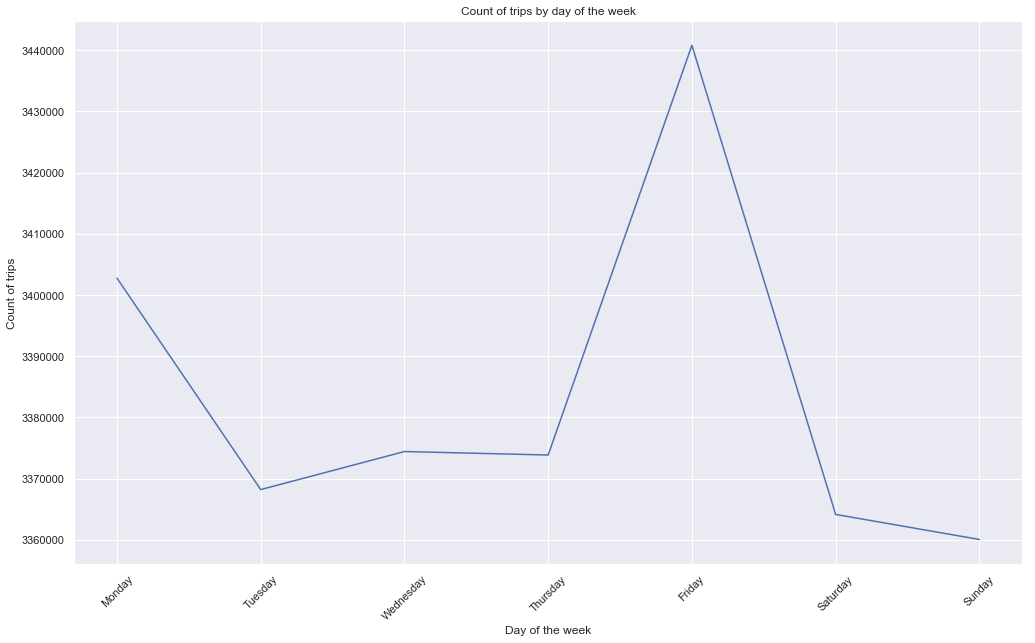

In [78]:
redhook_trips['dow'] = redhook_trips.date_time.dt.dayofweek
daily_trips = redhook_trips.groupby('dow').mean().reset_index()
plt.figure(figsize=(17,10))
plt.plot(daily_trips['dow'],daily_trips['ENTRIES'])
plt.xlabel('Day of the week')
plt.ylabel('Count of trips')
plt.title("Count of trips by day of the week")
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation = 45)

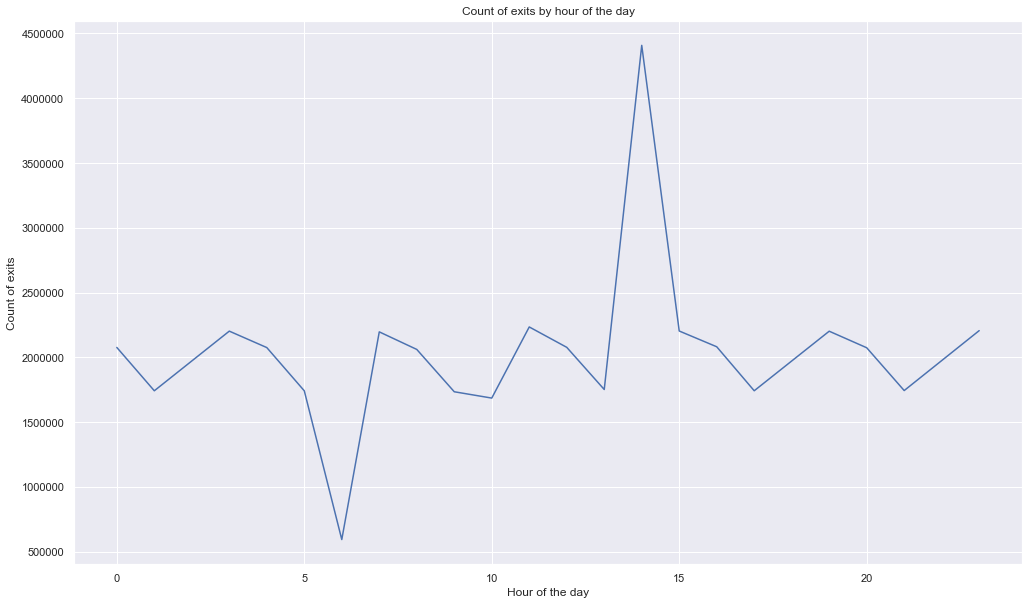

In [83]:
redhook_trips['hour'] = redhook_trips.date_time.dt.hour
hourly_trips = redhook_trips.groupby('hour').mean().reset_index()
plt.figure(figsize=(17,10))
plt.xlabel('Hour of the day')
plt.ylabel('Count of exits')
plt.title("Count of exits by hour of the day")
plt.plot(hourly_trips['hour'],hourly_trips['EXITS'],'-')

In [67]:
hourly_trips['TOTAL'] = hourly_trips['EXITS']+ hourly_trips['ENTRIES']

Text(0.5, 1.0, 'Count of entries by hour of the day')

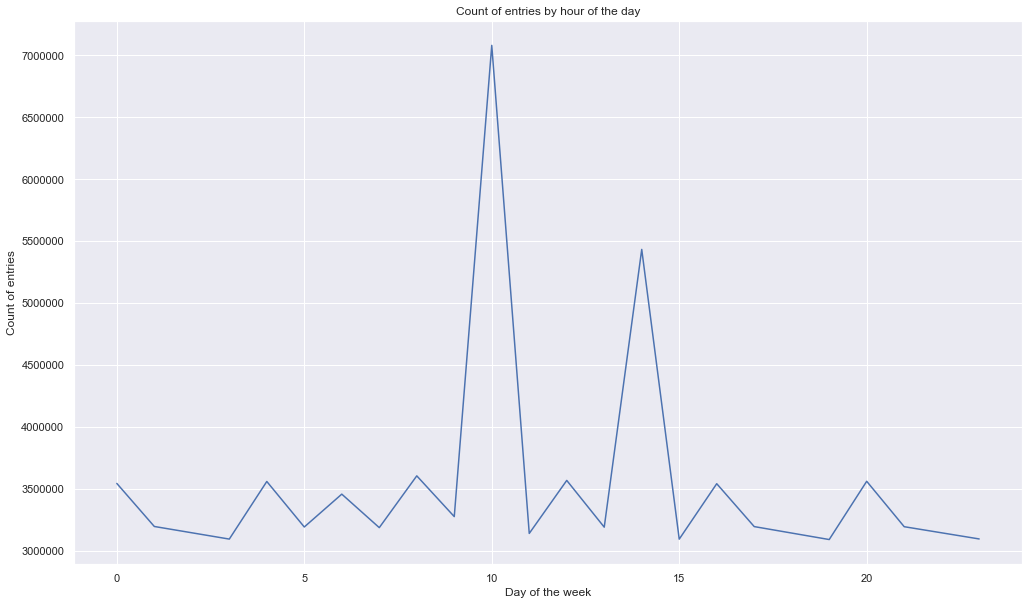

In [89]:
plt.figure(figsize=(17,10))
plt.plot(hourly_trips['hour'],hourly_trips['ENTRIES'],'-')
plt.xlabel('Day of the week')
plt.ylabel('Count of entries')
plt.title("Count of entries by hour of the day")

Text(0.5, 1.0, 'Count of trips by hour of the day')

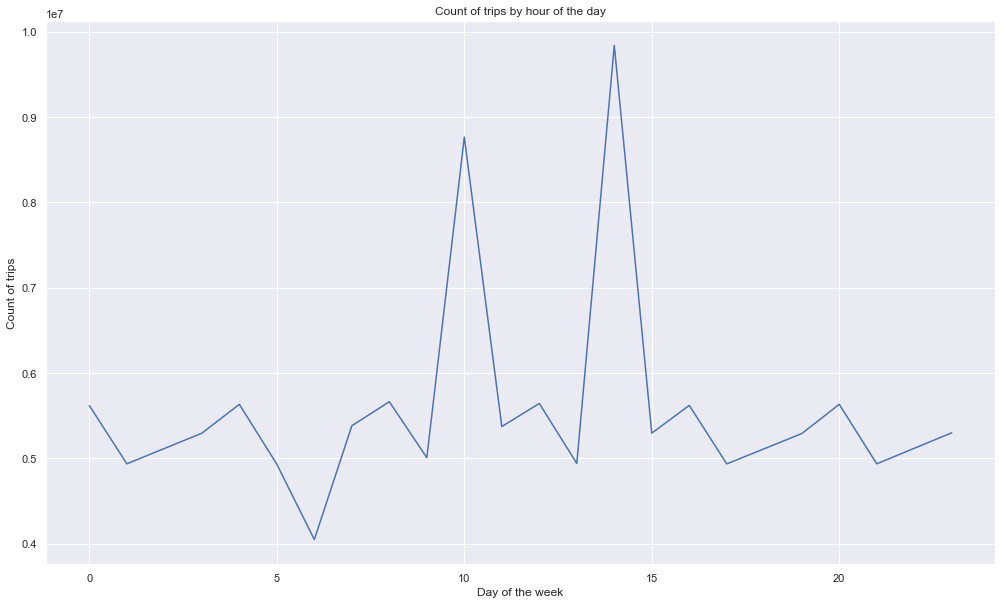

In [87]:
hourly_trips['TOTAL'] = hourly_trips['ENTRIES'] + hourly_trips['EXITS']
plt.figure(figsize=(17,10))
plt.plot(hourly_trips['hour'],hourly_trips['TOTAL'],'-')
plt.xlabel('Day of the week')
plt.ylabel('Count of trips')
plt.title("Count of trips by hour of the day")